# EDA
Data from: [Suicide and Depression Detection on Kaggle](https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch)

---

### Content

The dataset is a collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. The posts are collected using Pushshift API. All posts that were made to "SuicideWatch" from Dec 16, 2008(creation) till Jan 2, 2021, were collected while "depression" posts were collected from Jan 1, 2009, to Jan 2, 2021.

The posts collected from 'SuicideWatch' subreddit are labeled as 'suicide' while those collected from 'teenagers' are labelled 'non-suicide'.

### Collection

A notebook is provided to show how posts from Reddit can be collected using PushShift API.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
from IPython.core.display import HTML

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/210 Project/notebooks/Suicide_Detection.csv")
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
# Generates 4 samples of suicide data.
# df_shuffled = df.sample(random_state=42, frac=1)
# df_shuffled[0:25].to_csv("data_0.csv")
# df_shuffled[25:50].to_csv("data_1.csv")
# df_shuffled[50:75].to_csv("data_2.csv")
# df_shuffled[75:100].to_csv("data_3.csv")

In [ ]:
#3e675d
#7d9a79
#ce7173
#e6c4be
#ffe7e1
#ffffff
#6f4141
#31291f
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = ["#3e675d", "#ce7173", "#7d9a79", "#e6c4be", "#ffe7e1", "#ffffff", "#6f4141", "#31291f"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

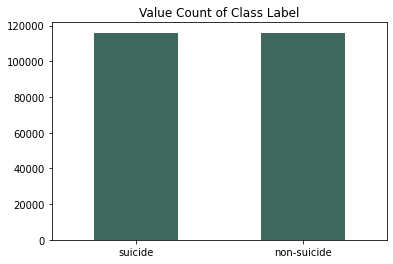

In [ ]:
bars = df['class'].value_counts().plot(kind='bar', cmap=cmap1, stacked=True)
plt.title('Value Count of Class Label')
plt.xticks(rotation=0)

In [ ]:
# Labeled 'suicide'
wc = WordCloud(width=1000, height=500, margin=0,
                mode="RGBA",
                background_color="white", 
                colormap="viridis").generate_from_text(" ".join(list(df[df['class'] == 'suicide']['text'])))

# Labeled 'non-suicide'
wc2 = WordCloud(width=1000, height=500, margin=0,
                mode="RGBA",
                background_color="black", 
                colormap="viridis").generate_from_text(" ".join(list(df[df['class'] == 'non-suicide']['text'])))

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(wc, interpolation='bilinear')
plt.title("Suicide labeled text")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wc2, interpolation='bilinear')
plt.title("Non-Suicide labeled text")
plt.axis("off")
plt.show()

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Word count distribution')

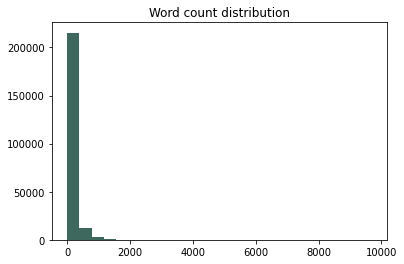

In [ ]:
# from https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
df['num_words'] = df['text'].str.split().\
    map(lambda x: len(x))
df['num_words'].hist(bins=25, color = "#3e675d")
plt.grid(False)
plt.title("Word count distribution")

Text(0, 0.5, 'Number of Entries')

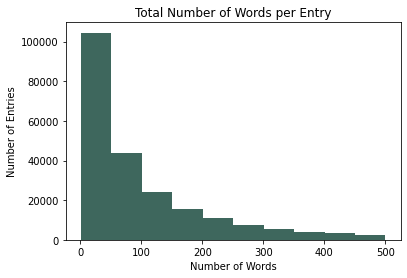

In [ ]:
df[df['num_words'] <= 500]['num_words'].hist(color="#3e675d")
plt.grid(False)
plt.title('Total Number of Words per Entry')
plt.xlabel('Number of Words')
plt.ylabel('Number of Entries')

Text(0, 0.5, 'Number of Entries')

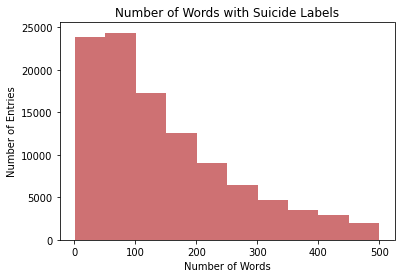

In [ ]:
df[(df['num_words'] <= 500) & (df['class'] == 'suicide')]['num_words'].hist(color="#ce7173")
plt.grid(False)
plt.title('Number of Words with Suicide Labels')
plt.xlabel('Number of Words')
plt.ylabel('Number of Entries')

Text(0, 0.5, 'Number of Entries')

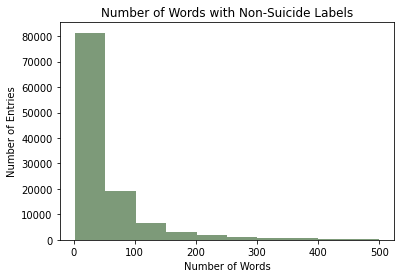

In [ ]:
df[(df['num_words'] <= 500) & (df['class'] == 'non-suicide')]['num_words'].hist(color="#7d9a79")
plt.grid(False)
plt.title('Number of Words with Non-Suicide Labels')
plt.xlabel('Number of Words')
plt.ylabel('Number of Entries')

Text(0.5, 1.0, 'Distribution of Total Number of Words')

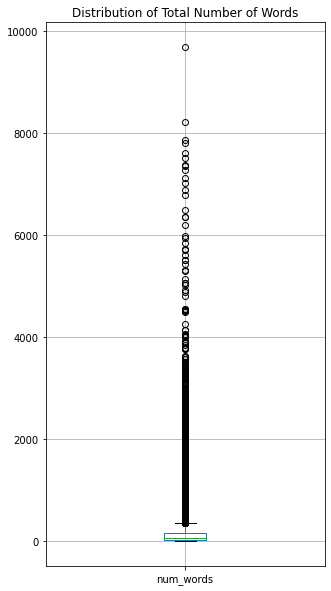

In [ ]:
plt.figure(figsize=(5, 10))
df.boxplot(column=['num_words'])
plt.title('Distribution of Total Number of Words')

In [ ]:
# from https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
df['avg_word_len'] = df['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x))

Text(0.5, 1.0, 'Distribution of average word length')

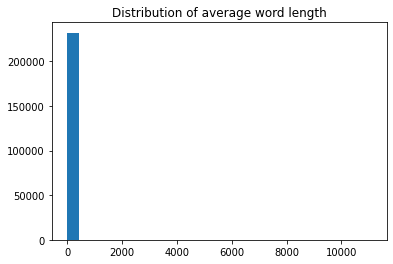

In [ ]:
df['avg_word_len'].hist(bins=25)
plt.grid(False)
plt.title("Distribution of average word length")

Text(0.5, 1.0, 'Distribution of average word length <=10 characters')

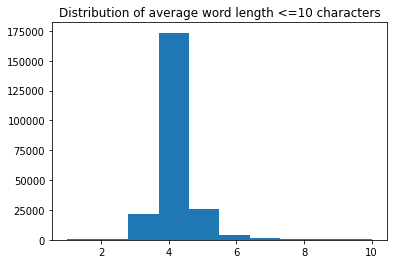

In [ ]:
df[df['avg_word_len'] <= 10]['avg_word_len'].hist()
plt.grid(False)
plt.title("Distribution of average word length <=10 characters")

In [ ]:
!pip install Textstat

In [ ]:
import textstat
df['flesch_readability'] = df['text'].apply(lambda x: textstat.flesch_reading_ease(x))
df.sort_values('flesch_readability', ascending=False)

In [ ]:
df['flesch_readability'].hist()
plt.grid(False)
plt.title("Flesch Reading Ease Score Distribution")

In [ ]:
df[df['flesch_readability'] == -182584.5]['text'].values

In [ ]:
df[(df['flesch_readability']>= -50) & (df['flesch_readability']<= 150)]['flesch_readability'].hist()
plt.grid(False)
plt.title('Flesch Readability Scores (-50-125)')

In [ ]:
df[(df['flesch_readability']>= -50) & (df['flesch_readability']<= 150) & (df['class'] == 'suicide')]['flesch_readability'].hist()
plt.grid(False)
plt.title('Flesch Readability Scores for Suicide Labeled Text')

In [ ]:
df[(df['flesch_readability']>= -50) & (df['flesch_readability']<= 150) & (df['class'] == 'non-suicide')]['flesch_readability'].hist()
plt.grid(False)
plt.title('Flesch Readability Scores for Non-Suicide Labeled Text')

Dale–Chall readability formula

The formula for calculating the raw score of the Dale–Chall readability score (1948) is given below:

$0.1579\left({\frac {{\mbox{difficult words}}}{{\mbox{words}}}}\times 100\right)+0.0496\left({\frac {{\mbox{words}}}{{\mbox{sentences}}}}\right)$

If the percentage of difficult words is above 5%, then add 3.6365 to the raw score to get the adjusted score, otherwise the adjusted score is equal to the raw score. Difficult words are all words that are not on the word list, but it has to be considered that the word list contains the basic forms of e.g. verbs and nouns. Regular plurals of nouns, regular past tense forms, progressive forms of verbs etc have to be added.


In [ ]:
df['dale_chall_readability'] = df['text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['dale_chall_readability'].hist()
plt.grid(False)
plt.title("Dale-Chall Reading Ease Score Distribution")

In [ ]:
df.sort_values('dale_chall_readability', ascending=False)

Named entity recognition

from https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
from collections import Counter

In [ ]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df['text'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()